## Part I: Analysing the Dataset

In [1]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("2023-2024 Big 5 European Leagues Stats .xlsx")

In [3]:
# Observing the dataset

df.head()

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90
0,Leverkusen,GER,1,34,28,6,0,89,24,65,90,73.6,29.9,43.7,1.29
1,Real Madrid,ESP,1,38,29,8,1,87,26,61,95,68.8,35.4,33.4,0.88
2,Inter,ITA,1,38,29,7,2,89,22,67,94,78.2,31.2,47.1,1.24
3,Manchester City,ENG,1,38,28,7,3,96,34,62,91,80.5,35.6,44.9,1.18
4,Arsenal,ENG,2,38,28,5,5,91,29,62,89,76.1,27.9,48.2,1.27


In [4]:
# Checking if there are any null values

df.isnull().sum()


Squad      0
Country    0
LgRk       0
MP         0
W          0
D          0
L          0
GF         0
GA         0
GD         0
Pts        0
xG         0
xGA        0
xGD        0
xGD/90     0
dtype: int64

In [5]:
# Removing unnecessary columns (xGD and xGD/90 are almost identical)

df.drop(["xGD/90"], axis=1, inplace=True)

In [6]:
df.head()

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD
0,Leverkusen,GER,1,34,28,6,0,89,24,65,90,73.6,29.9,43.7
1,Real Madrid,ESP,1,38,29,8,1,87,26,61,95,68.8,35.4,33.4
2,Inter,ITA,1,38,29,7,2,89,22,67,94,78.2,31.2,47.1
3,Manchester City,ENG,1,38,28,7,3,96,34,62,91,80.5,35.6,44.9
4,Arsenal,ENG,2,38,28,5,5,91,29,62,89,76.1,27.9,48.2


In [7]:
# Summary statistics

df.describe()



,LgRk,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,10.125000,36.500000,13.427083,9.645833,13.427083,52.645833,52.645833,0.000000,49.812500,50.797917,50.800000,-0.002083
std,5.606857,1.946657,6.528875,2.923513,5.737677,17.774600,14.738406,27.201393,18.506507,12.928320,11.070264,20.185857
min,1.000000,34.000000,2.000000,3.000000,0.000000,26.000000,22.000000,-69.000000,16.000000,30.300000,27.900000,-44.100000
25%,5.000000,34.000000,9.000000,8.000000,10.000000,40.000000,43.750000,-15.000000,37.000000,40.575000,41.950000,-12.025000
50%,10.000000,38.000000,12.500000,9.000000,14.000000,49.000000,51.000000,-5.500000,46.500000,47.400000,51.450000,-3.250000
75%,15.000000,38.000000,18.000000,11.250000,17.000000,62.000000,61.000000,15.750000,61.500000,56.050000,57.475000,11.500000
max,20.000000,38.000000,29.000000,19.000000,28.000000,96.000000,104.000000,67.000000,95.000000,87.800000,78.000000,53.000000


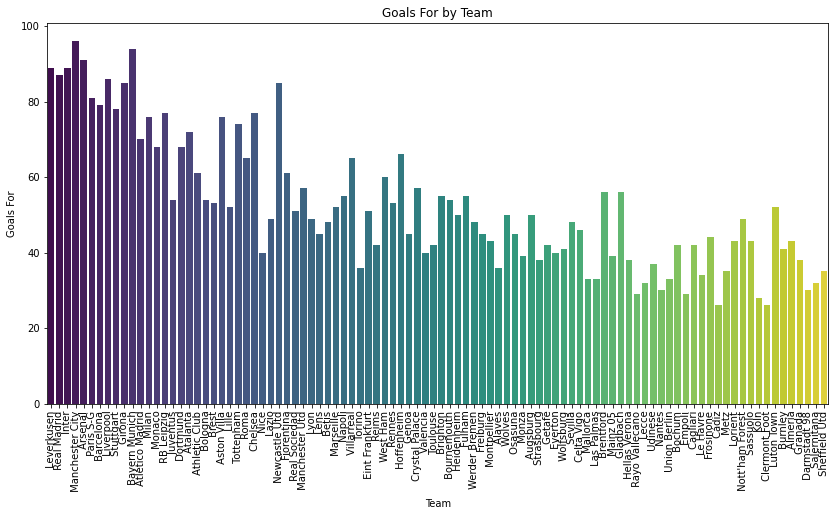

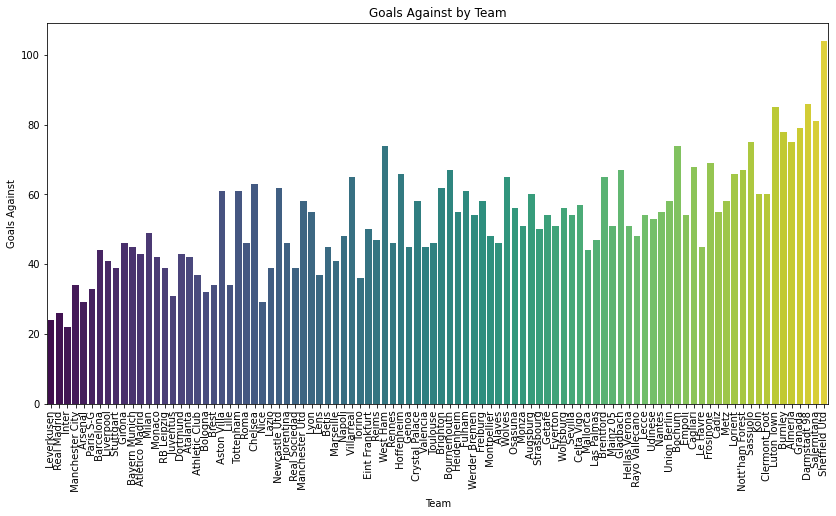

In [8]:
# Visualizing goals for and goals against


# Goals For by Team
plt.figure(figsize=(14, 7))
sns.barplot(x="Squad", y="GF", data=df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Goals For by Team")
plt.xlabel("Team")
plt.ylabel("Goals For")
plt.show()

# Goals Against by Team
plt.figure(figsize=(14, 7))
sns.barplot(x="Squad", y="GA", data=df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Goals Against by Team")
plt.xlabel("Team")
plt.ylabel("Goals Against")
plt.show()

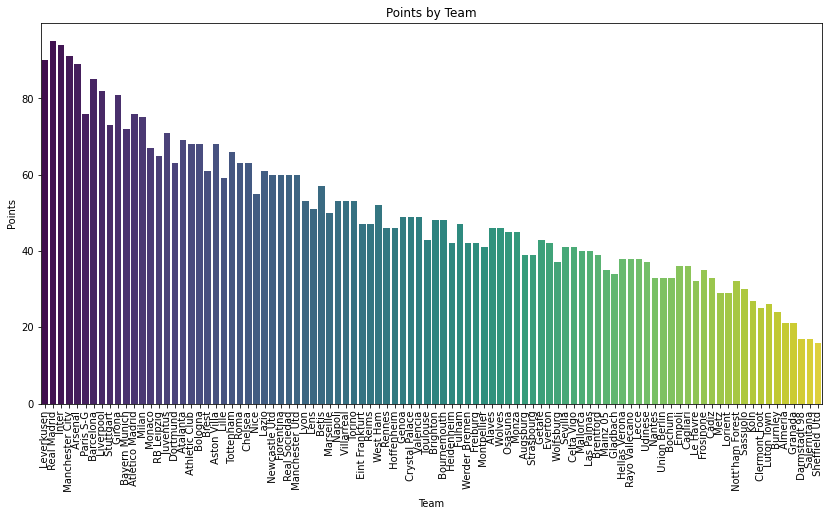

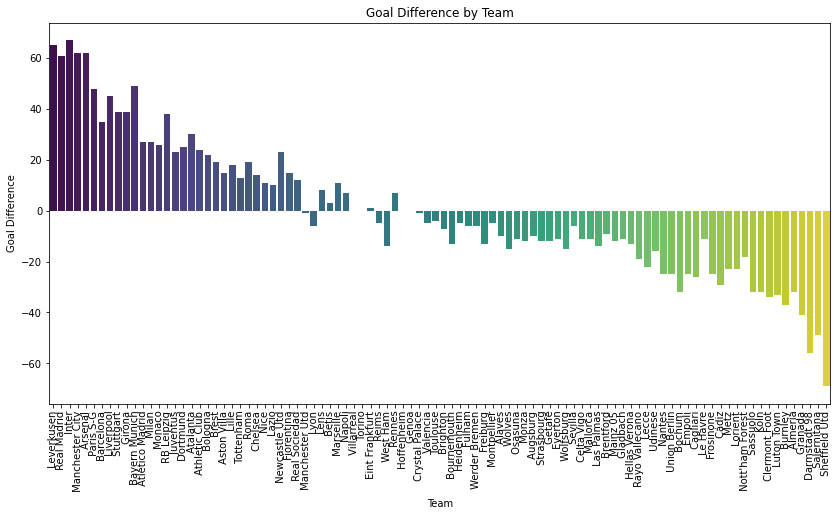

In [9]:
# Visualizing points by team and goal difference by team

# Points by Team
plt.figure(figsize=(14, 7))
sns.barplot(x="Squad", y="Pts", data=df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Points by Team")
plt.xlabel("Team")
plt.ylabel("Points")
plt.show()

# Goal Difference by Team
plt.figure(figsize=(14, 7))
sns.barplot(x="Squad", y="GD", data=df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Goal Difference by Team")
plt.xlabel("Team")
plt.ylabel("Goal Difference")
plt.show()


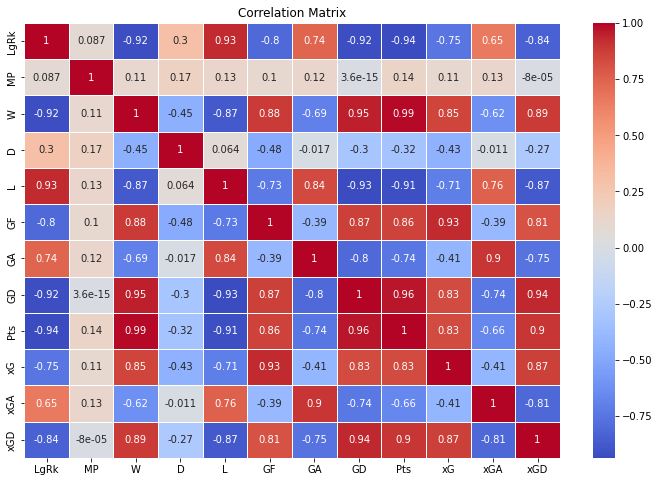

In [10]:
# Correlation analysis

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## Part II: Fitting Regression Models

In [11]:
# Encoding categorical feature

df_encoded = pd.get_dummies(data=df, columns=["Country"], drop_first=True)
df_encoded.head()

,Squad,LgRk,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,Country_ESP,Country_FRA,Country_GER,Country_ITA
0,Leverkusen,1,34,28,6,0,89,24,65,90,73.6,29.9,43.7,0,0,1,0
1,Real Madrid,1,38,29,8,1,87,26,61,95,68.8,35.4,33.4,1,0,0,0
2,Inter,1,38,29,7,2,89,22,67,94,78.2,31.2,47.1,0,0,0,1
3,Manchester City,1,38,28,7,3,96,34,62,91,80.5,35.6,44.9,0,0,0,0
4,Arsenal,2,38,28,5,5,91,29,62,89,76.1,27.9,48.2,0,0,0,0


In [12]:
# Choosing relevant features to use in the model

features = df_encoded[["GF", "GA", "xG", "xGA", "W", "D", "Country_ESP", "Country_FRA", "Country_GER", "Country_ITA"]]
target = df_encoded["LgRk"]


In [13]:
# Splitting the data into train and test 

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [14]:
# Fitting a linear regression model

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)


LinearRegression()

In [15]:
# Predicting test data

y_pred_lr = lin_reg.predict(X_test)

In [16]:
# Evaluating the model

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("MAE: " , mae_lr)
print("MSE: " , mse_lr)
print("R-squared: " , r2_lr)

MAE:  1.3948850966913935
MSE:  3.6927467194820403
R-squared:  0.8868643774668492


In [17]:
# Fitting a XGBoost regressor model

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


In [18]:
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [19]:
# Predicting test data

y_pred_xgb = xgb_regressor.predict(X_test)

In [20]:
# Evaluating the model

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("MAE: " , mae_xgb)
print("MSE: " , mse_xgb)
print("R-squared: " , r2_xgb)

MAE:  1.2272900253534318
MSE:  2.0563772317724665
R-squared:  0.9369982465755985


In [21]:
# Observing feature importance in the XGBoost model

importance = xgb_regressor.get_booster().get_score(importance_type="weight")

# Converting features to DataFrame for better visualization

importance_df = pd.DataFrame({"Feature": importance.keys(), "Importance": importance.values()})
importance_df.sort_values(by="Importance", ascending=False, inplace=True)

importance_df


,Feature,Importance
0,GF,320.0
1,GA,203.0
2,xG,173.0
3,xGA,154.0
4,W,106.0
5,D,88.0
7,Country_FRA,24.0
9,Country_ITA,24.0
8,Country_GER,19.0
6,Country_ESP,13.0


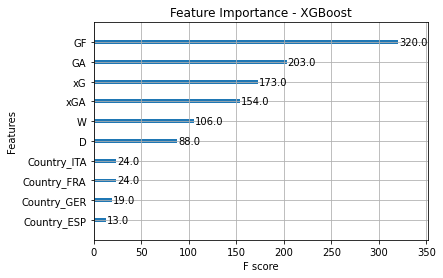

In [22]:
# Visualizing feature importance

xgb.plot_importance(xgb_regressor, importance_type="weight")
plt.title("Feature Importance - XGBoost")
plt.show()
